In [1]:
%reload_ext autoreload
%autoreload 2

import cv2

import os
import sys
sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

from collections import defaultdict

from matplotlib.path import Path
%matplotlib inline

from skimage.transform import estimate_transform

Setting environment for Gordon


In [3]:
# stack = 'MD589'
# old_stack = 'MD999'

stack = 'MD594'
old_stack = 'MD998'

In [4]:
indexMapOldToNew = dict(np.loadtxt(os.environ['DATA_DIR']+'/'+stack+'_indexMapOldToNew.txt').astype(np.int))

In [5]:
old_transforms = pickle.load(open(os.environ['DATA_DIR']+'/%s_finalTransfParams.pkl' % old_stack, 'r'))

In [6]:
if stack == 'MD589':
    cropbox_xmin = 645
    cropbox_ymin = 132
elif stack == 'MD594':
    cropbox_xmin = 635
    cropbox_ymin = 107

In [52]:
if os.path.exists('/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_originalLossless/'+stack):
    os.system('rm -r ' + '/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_originalLossless/'+stack)

for old_sec, new_sec in indexMapOldToNew.iteritems():

    try:
        dm = DataManager(stack=stack, section=old_sec, load_mask=False,
                        labeling_dir='/home/yuncong/CSHL_data_labelings/')
        user, ts, _, res  = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')
    except:
        continue
        
    sys.stderr.write('%d, %d\n' % (old_sec, new_sec))
    
    new_res = []
    for pol in res:
        new_pol = pol.copy()
        if len(pol['vertices']) == 0:
            continue
            
        
        vs = np.dot(old_transforms[old_sec], 
               (np.dot(np.diag([1./32, 1./32, 1]), 
                       np.c_[pol['vertices'], np.ones((len(pol['vertices']),))].T) +\
                        np.array([cropbox_xmin, cropbox_ymin, 0])[:,np.newaxis]))[:2].T
        vs *= 32
        new_pol['vertices'] = vs
        
        vs = np.dot(old_transforms[old_sec], 
               (np.dot(np.diag([1./32, 1./32, 1]), 
                       np.r_[new_pol['labelPos'],1]) + [cropbox_xmin, cropbox_ymin, 0]))[:2]
        vs *= 32
        new_pol['labelPos'] = np.squeeze(vs)
        
        new_res.append(new_pol)
        
    out_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_originalLossless/' + stack + '/' + '%04d'%new_sec
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    pickle.dump(new_res, 
                open(out_dir + '/' + stack + '_' + '%04d'%new_sec + '_' + user + '_' + ts + '_consolidated.pkl', 'w'))

Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any la

In [ ]:
# check map from old annotation to the old aligned cropped image

old_sec = 100
dm = DataManager(stack=stack, section=old_sec, load_mask=False, 
                 labeling_dir='/home/yuncong/CSHL_data_labelings/')
user, ts, _, res2 = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')

vs = [i for i in res2 if i['label'] == '7n'][0]['vertices']

img = imread(os.environ['DATA_DIR'] + '/' + old_stack + '_thumbnail_aligned_cropped/' + old_stack + '_%04d_thumbnail_aligned_cropped.tif'%\
             old_sec)
viz = img_as_ubyte(img)

for x,y in np.asarray(vs) / 32.:
    cv2.circle(viz, (int(x), int(y)), 3, (255,0,0))
    
plt.figure(figsize=(10,10));
plt.imshow(viz);

Cannot find image


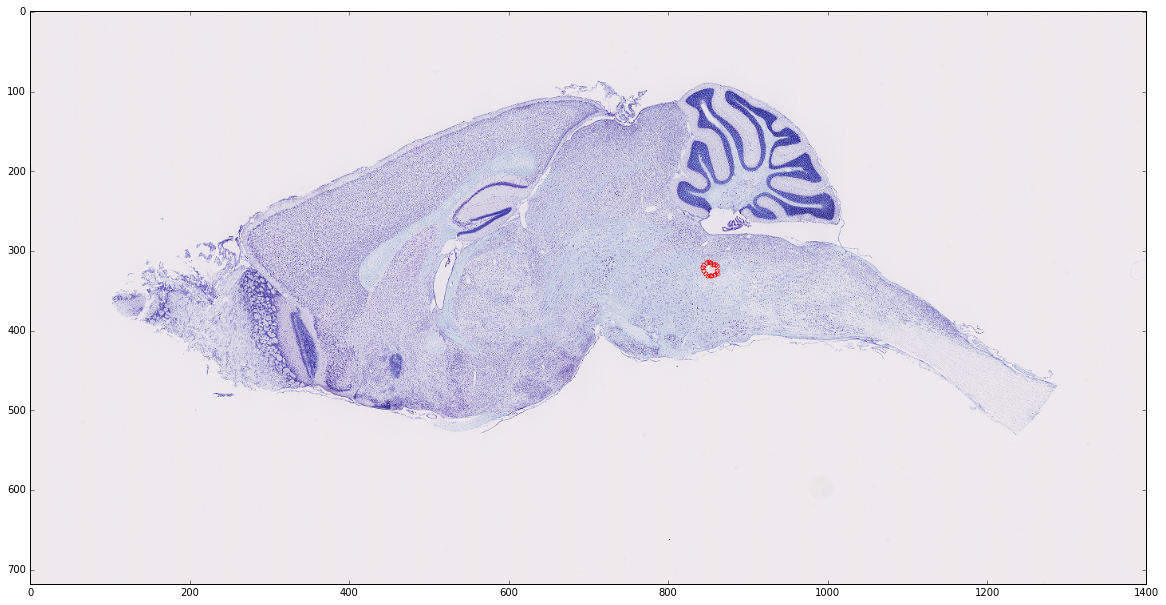

In [53]:
# check map from old annotation to original uncropped image

old_sec = 100
dm = DataManager(stack=stack, section=old_sec, load_mask=False, 
                 labeling_dir='/home/yuncong/CSHL_data_labelings/')
user, ts, _, res2 = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')

img = imread(os.environ['DATA_DIR'] + '/' + stack + '_thumbnail_renamed/' + stack + '_%04d_thumbnail.tif'% indexMapOldToNew[old_sec])

vs = [i for i in res2 if i['label'] == '7n'][0]['vertices']

vs = np.dot(old_transforms[old_sec], 
               (np.dot(np.diag([1./32, 1./32, 1]), 
                       np.c_[vs, np.ones((len(vs),))].T) + np.array([cropbox_xmin, cropbox_ymin, 0])[:,np.newaxis]))[:2].T

viz = img_as_ubyte(img)

for x,y in vs:
    cv2.circle(viz, (int(x), int(y)), 3, (255,0,0))
    
plt.figure(figsize=(20,20));
plt.imshow(viz);

In [12]:
if stack == 'MD589':
    new_cropping_xmin = 643
    new_cropping_ymin = 145
elif stack == 'MD594':
    new_cropping_xmin = 616
    new_cropping_ymin = 144

In [13]:
transforms = pickle.load(open(os.environ['DATA_DIR']+'/' + stack + '_finalTransfParams.pkl', 'r'))

In [14]:
# check map from original uncropped image to new cropped image, lossless

mapping_originalLosslessToLosslessAlignedCropped = dict()

for i in indexMapOldToNew.itervalues():
    T = np.linalg.inv(transforms[i])
    T[:2, 2] = (T[:2, 2] - [new_cropping_xmin, new_cropping_ymin])*32
    mapping_originalLosslessToLosslessAlignedCropped[i] = T

pickle.dump(mapping_originalLosslessToLosslessAlignedCropped, 
            open(os.environ['DATA_DIR'] +'/' + stack + '_mappingFromOriginalLosslessToLosslessAlignedCropped.pkl', 'w'))

In [ ]:
dm = DataManager(stack='MD589', section=197, load_mask=False, 
                 labeling_dir='/home/yuncong/CSHL_data_labelings_originalLossless/')
user, ts, _, res2 = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')

dm._load_image('rgb-jpg')
img = dm.image_rgb

vs = [i for i in res2 if i['label'] == 'Pn'][0]['vertices']

T = mapping_originalLosslessToLosslessAlignedCropped[197]
vs = np.dot(T, np.vstack([vs.T, np.ones((1, vs.shape[0]))]))[:2].T

viz = img_as_ubyte(img)

for x,y in vs:
    cv2.circle(viz, (int(x), int(y)), 20, (255,0,0), -1)
    
xmin, ymin = vs.min(axis=0)
xmax, ymax = vs.max(axis=0)
display(viz[ymin:ymax+1, xmin:xmax+1])

In [15]:
# check map from original uncropped image to new cropped image, thumbnail

mapping_originalLosslessToThumbnailAlignedCropped = dict()

for i in indexMapOldToNew.itervalues():
    T = np.linalg.inv(transforms[i])
    T[:2, 2] = T[:2, 2] - [new_cropping_xmin, new_cropping_ymin]
    mapping_originalLosslessToThumbnailAlignedCropped[i] = T
    
# pickle.dump(mapping_originalLosslessToThumbnailAlignedCropped, 
#             open(os.environ['DATA_DIR'] +'/' + stack + '_mapping_originalLosslessToThumbnailAlignedCropped.pkl', 'w'))

In [20]:
sec = 211
dm = DataManager(stack=stack, section=sec, load_mask=False, 
                 labeling_dir='/home/yuncong/CSHL_data_labelings_originalLossless/')
user, ts, _, res2 = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')


img = imread(os.environ['DATA_DIR'] + '/' + stack +'_thumbnail_aligned_cropped/' + stack + '_%04d_thumbnail_aligned_cropped.tif'%sec)

vs = [i for i in res2 if i['label'] == '7n'][0]['vertices'] / 32.

T = mapping_originalLosslessToThumbnailAlignedCropped[sec]
vs = np.dot(T, np.vstack([vs.T, np.ones((1, vs.shape[0]))]))[:2].T

viz = img_as_ubyte(img)

for x,y in vs:
    cv2.circle(viz, (int(x), int(y)), 3, (255,0,0))
    
plt.figure(figsize=(20,20));
plt.imshow(viz);

Cannot find image
username yuncong does not have any labelings


TypeError: 'NoneType' object is not iterable

In [21]:
if os.path.exists('/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped/'+stack):
    os.system('rm -r ' + '/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped/'+stack)

In [22]:
for section in indexMapOldToNew.itervalues():

    try:
        dm = DataManager(stack=stack, section=section, load_mask=False, 
                         labeling_dir='/home/yuncong/CSHL_data_labelings_originalLossless/')
        user, ts, _, results = dm.load_proposal_review_result('yuncong', 'latest', 'consolidated')
    except:
        continue
    
    print section

    T = mapping_originalLosslessToLosslessAlignedCropped[section]
    
    new_res = []
    for pol in results:
        new_pol = pol.copy()
        if len(pol['vertices']) == 0:
            continue
        
        vs = pol['vertices']
        new_pol['vertices'] = np.dot(T, np.vstack([vs.T, np.ones((1, vs.shape[0]))]))[:2].T.astype(np.int) 
        
        vs = pol['labelPos']
        new_pol['labelPos'] = np.squeeze(np.dot(T, np.r_[vs, 1]))[:2].T.astype(np.int)
        
        new_res.append(new_pol)

    out_dir = '/oasis/projects/nsf/csd395/yuncong/CSHL_data_labelings_losslessAlignCropped/' + stack + '/' + '%04d'%section
    if not os.path.exists(out_dir):
        os.makedirs(out_dir)

    pickle.dump(new_res, 
                open(out_dir + '/' + stack + '_' + '%04d'%section + '_' + user + '_' + ts + '_consolidated.pkl', 'w'))

Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any la

94
96

Cannot find image
Cannot find image



98
100

Cannot find image
Cannot find image



102
104

Cannot find image
Cannot find image



106
108

Cannot find image
Cannot find image



110
112

Cannot find image
Cannot find image



114
116

Cannot find image
Cannot find image



118
120

Cannot find image
Cannot find image



122
124

Cannot find image
Cannot find image



126
128

Cannot find image
Cannot find image



130
132

Cannot find image
Cannot find image



134
136

Cannot find image
Cannot find image



138
140

Cannot find image
Cannot find image



142
144

Cannot find image
Cannot find image



146
148

Cannot find image
Cannot find image



150
152

Cannot find image
Cannot find image



154
156

Cannot find image
Cannot find image



158
160

Cannot find image
Cannot find image



162
164

Cannot find image
Cannot find image



166
168

Cannot find image
Cannot find image



170
172

Cannot find image
Cannot find image



174
176

Cannot find image
Cannot find image



178
180

Cannot find image
Cannot find image



182
184

Cannot find image
Cannot find image



186
188

Cannot find image
Cannot find image



190
192

Cannot find image
Cannot find image



194
196

Cannot find image
Cannot find image



198
200

Cannot find image
Cannot find image



202
204

Cannot find image
Cannot find image



206
208

Cannot find image
Cannot find image



210
212

Cannot find image
Cannot find image



214
216

Cannot find image
Cannot find image



218
220

Cannot find image
Cannot find image



222
224

Cannot find image
Cannot find image



226
228

Cannot find image
Cannot find image



230
232

Cannot find image
Cannot find image



234
236

Cannot find image
Cannot find image



238
239

Cannot find image
Cannot find image



240
242

Cannot find image
Cannot find image



244
246

Cannot find image
Cannot find image



248
250

Cannot find image
Cannot find image



252
254

Cannot find image
Cannot find image



256
258

Cannot find image
Cannot find image



260
262

Cannot find image
Cannot find image



264
266

Cannot find image
Cannot find image



268
270

Cannot find image
Cannot find image



272
274

Cannot find image
Cannot find image



276
278

Cannot find image
Cannot find image



280
282

Cannot find image
Cannot find image



284
286

Cannot find image
Cannot find image



288
290

Cannot find image
Cannot find image



292
294

Cannot find image
Cannot find image



296
298

Cannot find image
Cannot find image



300
302

Cannot find image
Cannot find image



304
306

Cannot find image
Cannot find image



308
310

Cannot find image
Cannot find image



312
314

Cannot find image
Cannot find image



316
318

Cannot find image
Cannot find image



320
322

Cannot find image
Cannot find image



324
326

Cannot find image
Cannot find image



328
330

Cannot find image
Cannot find image



332
334

Cannot find image
Cannot find image



336
338

Cannot find image
Cannot find image



340
342

Cannot find image
Cannot find image



344
346

Cannot find image
Cannot find image



348
350

Cannot find image
Cannot find image



352
354

Cannot find image
Cannot find image



356
358

Cannot find image
Cannot find image



360
362

Cannot find image
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong does not have any labelings
Cannot find image
username yuncong do

username yuncong does not have any labelings
